In [1]:
import os
import csv
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/ML_MBD_Project/mbd_dataset2.csv")

In [4]:
len(train_data)

2449051

In [5]:
train_data.head()

,rcvTime,sender,messageID,receiver,posX,posY,pos_noiseX,pos_noiseY,spdX,spdY,...,spd_noiseY,aclX,aclY,acl_noiseX,acl_noiseY,hedX,hedY,hed_noiseX,hed_noiseY,label
0,27044.448149,905.0,33757073.0,909,1340.637344,1050.209731,3.600070,3.467079,-5.078127,-8.564898,...,0.005328,-1.322832,-2.231152,0.000730,0.001230,-0.536376,-0.843979,22.448294,31.813532,0
1,27044.704531,898.0,33759305.0,909,1378.408291,1091.019857,3.802718,4.035042,-7.056122,-11.901074,...,-0.004702,-0.196124,-0.330802,0.000137,0.000517,-0.612571,-0.790415,22.597318,36.683480,1
2,27044.744747,821.0,33759747.0,909,1384.658828,1213.150552,4.907842,4.692573,-1.598071,12.780995,...,0.035543,-0.011515,0.102197,0.004414,0.000110,-0.091318,0.995822,6.993068,1.660324,0
3,27045.166693,910.0,33772765.0,909,1375.874232,1114.169913,3.434970,3.519160,9.525130,-3.484410,...,-0.000000,0.000002,0.000002,0.000104,0.000104,-0.400457,-0.916316,16.731783,16.731783,1
4,27045.448140,905.0,33775101.0,909,1335.059523,1040.696089,3.573822,3.425401,-6.032388,-10.174461,...,0.006796,-0.706113,-1.191003,0.000870,0.001468,-0.536376,-0.843979,24.696326,37.369756,0


In [ ]:
data = train_data[train_data.receiver==909]
genuine_data = data[data.sender==905]

In [ ]:
attacker_data = data[data.sender==910]

In [ ]:
genuine_data

,rcvTime,sender,messageID,receiver,posX,posY,pos_noiseX,pos_noiseY,spdX,spdY,...,spd_noiseY,aclX,aclY,acl_noiseX,acl_noiseY,hedX,hedY,hed_noiseX,hed_noiseY,label
0,27044.448149,905.0,33757073.0,909,1340.637344,1050.209731,3.600070,3.467079,-5.078127,-8.564898,...,0.005328,-1.322832,-2.231152,0.000730,1.230360e-03,-0.536376,-0.843979,22.448294,31.813532,0
4,27045.448140,905.0,33775101.0,909,1335.059523,1040.696089,3.573822,3.425401,-6.032388,-10.174461,...,0.006796,-0.706113,-1.191003,0.000870,1.467750e-03,-0.536376,-0.843979,24.696326,37.369756,0
9,27046.448146,905.0,33784522.0,909,1328.175420,1029.714929,3.553624,3.536618,-7.428107,-11.704127,...,0.008073,-0.910605,-1.434823,0.000757,1.277070e-03,-0.574139,-0.818758,28.395574,43.546758,0
14,27047.448138,905.0,33803215.0,909,1320.675301,1017.559462,3.334211,3.256294,-7.701112,-12.134207,...,0.009286,0.055737,0.087765,0.001107,1.213677e-03,-0.574139,-0.818758,29.181086,45.459884,0
19,27048.448143,905.0,33814155.0,909,1313.060244,1005.370085,3.365352,3.454396,-7.697749,-12.129184,...,0.009628,0.319513,0.503381,0.000217,3.412372e-04,-0.574139,-0.818758,29.172668,45.439222,0
24,27049.448150,905.0,33823690.0,909,1304.817530,993.471086,3.512912,3.368499,-8.884806,-11.313210,...,0.009624,0.647161,0.824005,0.000003,3.985785e-06,-0.686031,-0.727572,32.849673,41.878904,0
29,27050.448144,905.0,33832710.0,909,1294.081653,983.709354,3.476071,3.510998,-11.039292,-9.329311,...,0.008976,-0.650835,-0.550007,0.000942,6.474149e-04,-0.818859,-0.573995,40.745924,34.341608,0
33,27051.448148,905.0,33846845.0,909,1281.418468,976.758589,3.467769,3.652022,-13.299136,-5.632911,...,0.007402,0.249333,0.105673,0.001709,1.574078e-03,-0.952207,-0.305453,51.080687,23.731042,0
37,27052.448143,905.0,33860228.0,909,1267.263568,974.955598,3.457058,3.449916,-14.448235,-0.140549,...,0.004469,-0.097428,-0.000886,0.001793,2.932821e-03,-0.996762,0.080407,57.299092,13.701648,0
41,27053.448139,905.0,33869543.0,909,1252.867797,976.166954,3.418654,3.338987,-14.406546,1.217703,...,0.000112,0.242912,-0.020456,0.000912,4.357785e-03,-0.983981,0.178271,57.057616,11.960824,0


In [ ]:
attacker_data

,rcvTime,sender,messageID,receiver,posX,posY,pos_noiseX,pos_noiseY,spdX,spdY,...,spd_noiseY,aclX,aclY,acl_noiseX,acl_noiseY,hedX,hedY,hed_noiseX,hed_noiseY,label
3,27045.166693,910.0,33772765.0,909,1375.874232,1114.169913,3.434970,3.519160,9.525130,-3.484410,...,-0.000000,0.000002,0.000002,1.042505e-04,1.042505e-04,-0.400457,-0.916316,16.731783,16.731783,8
8,27046.166691,910.0,33782406.0,909,1375.271115,1112.885305,3.465877,3.564542,7.830137,7.453464,...,-0.000000,-1.058908,-2.389627,0.000000e+00,0.000000e+00,-0.410985,-0.911642,18.485592,20.952546,8
13,27047.166684,910.0,33800348.0,909,1373.968445,1109.606954,3.266530,3.404715,-11.579677,-14.780288,...,0.000235,-1.052594,-2.252210,1.039185e-04,2.345117e-04,-0.429201,-0.903209,20.258611,25.192972,8
18,27048.166683,910.0,33811758.0,909,1371.601627,1104.490239,3.472938,3.511006,-12.196121,0.254729,...,0.000427,-1.048547,-2.243550,9.548028e-05,1.921378e-04,-0.438852,-0.898559,22.117888,30.400008,8
23,27049.166685,910.0,33821148.0,909,1367.955417,1097.434132,3.589757,3.584113,-12.720633,1.773699,...,0.000623,-1.029364,-2.010556,9.153877e-05,1.958633e-04,-0.470899,-0.882187,25.133814,37.042811,8
28,27050.166692,910.0,33830713.0,909,1363.062216,1088.511957,3.502291,3.576600,1.009772,0.786400,...,0.000829,-1.152772,-2.103814,1.332593e-04,2.060303e-04,-0.495480,-0.868619,28.595132,44.494955,8
32,27051.166683,910.0,33843912.0,909,1356.826414,1077.793387,3.553790,3.587340,3.141402,-14.932056,...,0.001020,-1.023560,-1.726353,1.345069e-04,1.910932e-04,-0.524655,-0.851315,32.980720,52.555351,8
36,27052.166692,910.0,33857990.0,909,1350.082241,1066.017134,3.622691,3.716707,-16.828996,-21.348740,...,0.001193,0.087371,0.147356,1.487530e-04,1.735692e-04,-0.530345,-0.847782,33.604054,54.241501,8
40,27053.166687,910.0,33867045.0,909,1342.989010,1054.220891,3.469797,3.632926,-13.840660,-0.879256,...,0.001226,0.469337,0.791585,1.951657e-05,3.291883e-05,-0.530345,-0.847782,33.487529,53.924648,8
44,27054.166683,910.0,33880898.0,909,1336.014747,1042.448397,3.346875,3.579798,-2.958090,-17.092582,...,0.001220,-0.037733,-0.063646,3.620332e-06,6.106741e-06,-0.530345,-0.847782,33.513002,53.993847,8


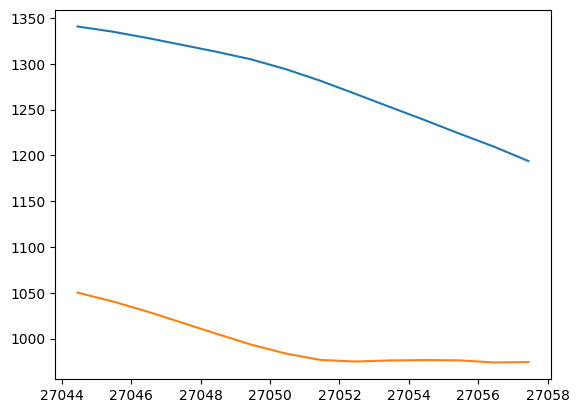

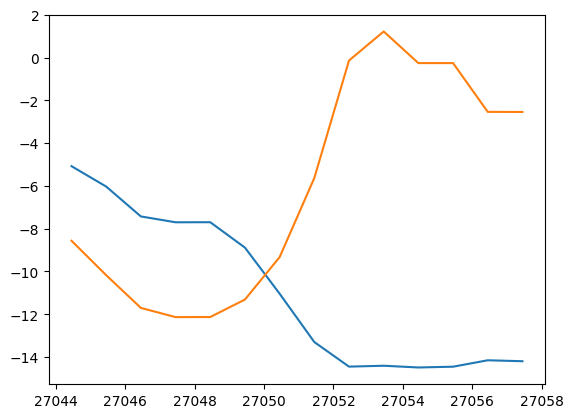

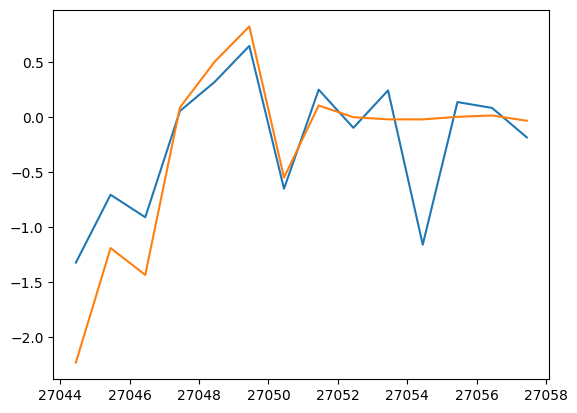

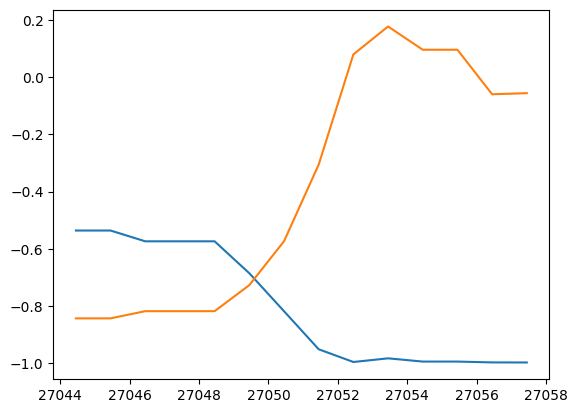

In [ ]:
plt.plot(genuine_data['rcvTime'], genuine_data['posX'])
plt.plot(genuine_data['rcvTime'], genuine_data['posY'])
plt.show()
plt.plot(genuine_data['rcvTime'], genuine_data['spdX'])
plt.plot(genuine_data['rcvTime'], genuine_data['spdY'])
plt.show()
plt.plot(genuine_data['rcvTime'], genuine_data['aclX'])
plt.plot(genuine_data['rcvTime'], genuine_data['aclY'])
plt.show()
plt.plot(genuine_data['rcvTime'], genuine_data['hedX'])
plt.plot(genuine_data['rcvTime'], genuine_data['hedY'])
plt.show()

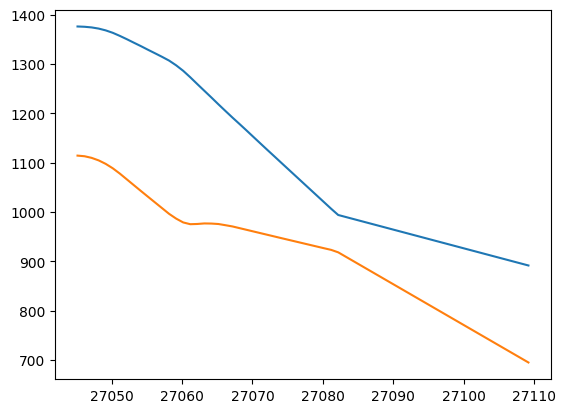

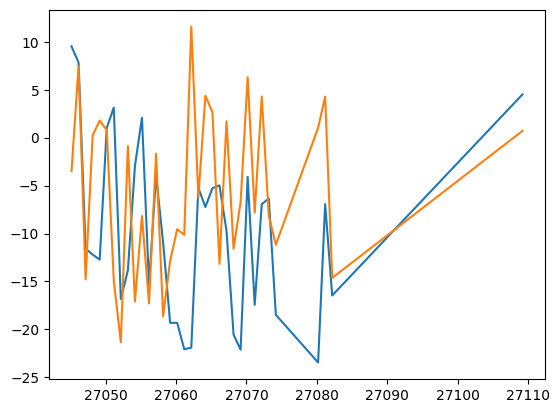

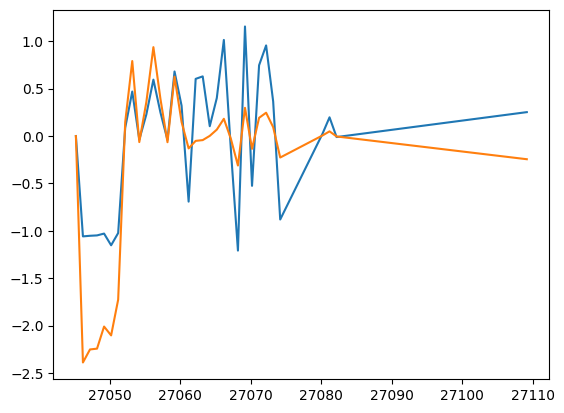

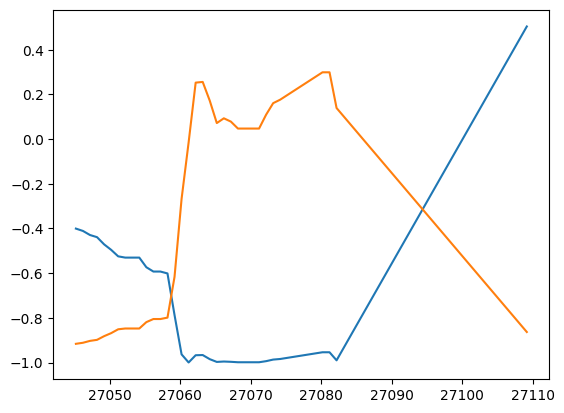

In [ ]:
plt.plot(attacker_data['rcvTime'], attacker_data['posX'])
plt.plot(attacker_data['rcvTime'], attacker_data['posY'])
plt.show()
plt.plot(attacker_data['rcvTime'], attacker_data['spdX'])
plt.plot(attacker_data['rcvTime'], attacker_data['spdY'])
plt.show()
plt.plot(attacker_data['rcvTime'], attacker_data['aclX'])
plt.plot(attacker_data['rcvTime'], attacker_data['aclY'])
plt.show()
plt.plot(attacker_data['rcvTime'], attacker_data['hedX'])
plt.plot(attacker_data['rcvTime'], attacker_data['hedY'])
plt.show()

# RNN
Recurrent neural networks can be used to classify time series

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import GroupShuffleSplit

In [7]:
train_data.pop('messageID')
train_data.pop('pos_noiseX')
train_data.pop('pos_noiseY')
train_data.pop('spd_noiseX')
train_data.pop('spd_noiseY')
train_data.pop('acl_noiseX')
train_data.pop('acl_noiseY')
train_data.pop('hed_noiseX')
train_data.pop('hed_noiseY')

0          31.813532
1          36.683480
2           1.660324
3          16.731783
4          37.369756
             ...    
2449046    12.623912
2449047    18.552073
2449048     7.688180
2449049    20.262550
2449050     1.024139
Name: hed_noiseY, Length: 2449051, dtype: float64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449051 entries, 0 to 2449050
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   rcvTime   float64
 1   sender    float64
 2   receiver  int64  
 3   posX      float64
 4   posY      float64
 5   spdX      float64
 6   spdY      float64
 7   aclX      float64
 8   aclY      float64
 9   hedX      float64
 10  hedY      float64
 11  label     int64  
dtypes: float64(10), int64(2)
memory usage: 224.2 MB


In [9]:
splitter = GroupShuffleSplit(train_size=.70, test_size=.30)
split = splitter.split(train_data, groups=train_data['receiver'])
train_inds, test_inds = next(split)

train = train_data.iloc[train_inds]
test = train_data.iloc[test_inds]

In [10]:
print(train.shape)
print(test.shape)

(1731641, 12)
(717410, 12)


In [11]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1:]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1:]

In [12]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

In [13]:
x_train = train_x.reshape(-1, train_x.shape[0], train_x.shape[1])
x_test  = test_x.reshape(-1, test_x.shape[0], test_x.shape[1])
y_train = train_y.reshape(-1, train_y.shape[0], train_y.shape[1])
y_test = test_y.reshape(-1, test_y.shape[0], test_y.shape[1])

In [14]:
rnn = keras.Sequential()
rnn.add(layers.SimpleRNN(128, input_shape=(train_x.shape),return_sequences=True))
rnn.add(Dense(1, activation='relu'))
rnn.compile(loss='categorical_crossentropy', optimizer='adam')
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1731641, 128)      17920     
                                                                 
 dense (Dense)               (None, 1731641, 1)        129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(1, 1731641, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


In [ ]:
 # evaluate model
loss, accuracy = rnn.evaluate(x_test, y_test, batch_size=y_test.shape[0], verbose=0)
print(loss, accuracy)